In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import pylab as p

In [70]:
df = pd.read_csv('FuelConsumption.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [71]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [72]:
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


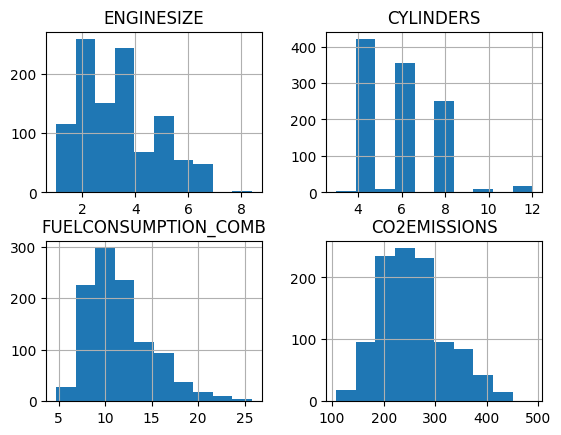

In [73]:
cdf.hist()
plt.show()

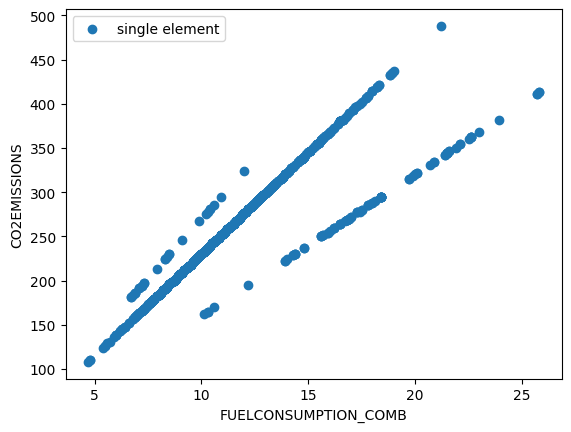

In [74]:
y=cdf['CO2EMISSIONS'].tolist()
x=cdf['FUELCONSUMPTION_COMB'].tolist()
plt.scatter(x, y,)
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('CO2EMISSIONS')
plt.legend(['single element'])
plt.show()

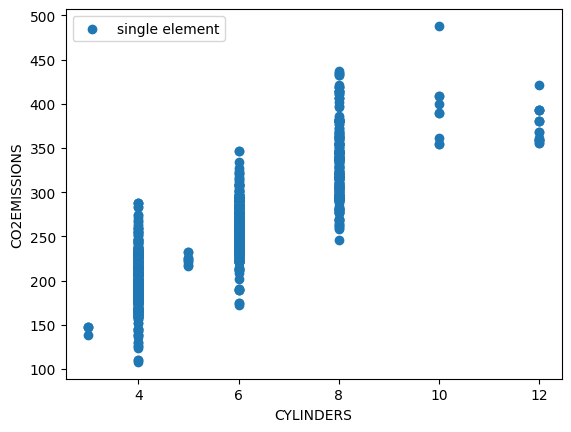

In [75]:
y=cdf['CO2EMISSIONS'].tolist()
x=cdf['CYLINDERS'].tolist()
plt.scatter(x, y,)
plt.xlabel('CYLINDERS')
plt.ylabel('CO2EMISSIONS')
plt.legend(['single element'])
plt.show()

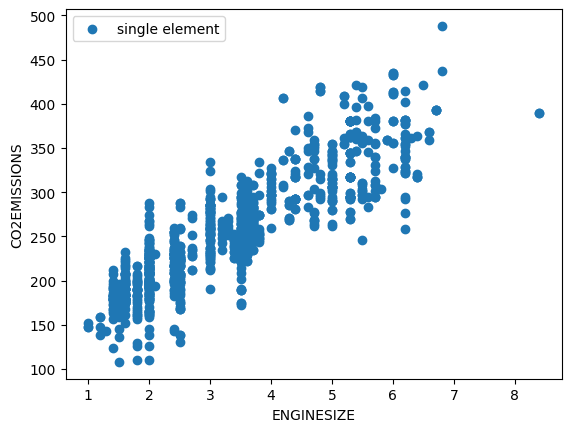

In [76]:
y=cdf['CO2EMISSIONS'].tolist()
x=cdf['ENGINESIZE'].tolist()
plt.scatter(x, y,)
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.legend(['single element'])
plt.show()

### Working With my knowleg

In [77]:
mean_of_x1 = cdf['ENGINESIZE'].mean()
mean_of_y = cdf['CO2EMISSIONS'].mean()

up = 0
for item in range(len(cdf['ENGINESIZE'].tolist())):
    up += (cdf['ENGINESIZE'][item] - mean_of_x1) * (cdf['CO2EMISSIONS'][item] - mean_of_y)

down = 0
for item in range(len(cdf['ENGINESIZE'].tolist())):
    down += (cdf['ENGINESIZE'][item] - mean_of_x1) ** 2

teta_1 = up / down
teta_0 = mean_of_y - (teta_1 * mean_of_x1)

print(f'teta_0 is : {teta_0}\nteta_1 is : {teta_1}') 

teta_0 is : 125.30409949535692
teta_1 is : 39.12519978671172


In [78]:
x1 = cdf['ENGINESIZE'].tolist()
line = 1067 * []
for i in range(1067):
    line.insert(i, teta_0 + (teta_1 * x1[i]))


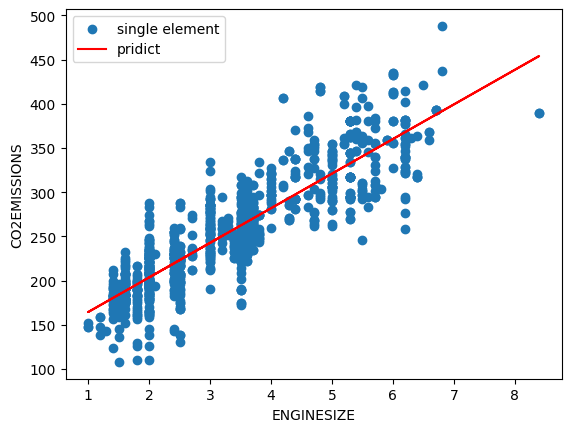

In [79]:
y=cdf['CO2EMISSIONS'].tolist()
x=cdf['ENGINESIZE'].tolist()
plt.scatter(x, y,)
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.plot(x1, line, color= 'red')
plt.legend(['single element', 'pridict'])
plt.show()

### finding 80% of train and 20% test by my way

In [80]:
len_of_my_data = len(cdf['CO2EMISSIONS'])

train_index = set()

while len(train_index) != (int(len_of_my_data * 0.8)):
    train_index.add(np.random.randint(0,len_of_my_data))

test_index = set(range(len_of_my_data)) - train_index
# train_index
# test_index


In [81]:
x1_train = []
y_train = []

for item in train_index:
    x1_train.append(cdf['ENGINESIZE'][item])
    y_train.append(cdf['CO2EMISSIONS'][item])

x1_test = []
y_test = []

for item in test_index:
    x1_test.append(cdf['ENGINESIZE'][item])
    y_test.append(cdf['CO2EMISSIONS'][item])


x1_train = np.array(x1_train)
x1_test = np.array(x1_test)

y_train = np.array(y_train)
y_test = np.array(y_test)

### Working with Scikit-Learn

In [82]:
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(x1_train.reshape(-1, 1), y_train.reshape(-1, 1))

print(f'Coefficients : {reg.coef_}')
print(f'Intercept : {reg.intercept_}')

Coefficients : [[39.3688462]]
Intercept : [125.64097861]


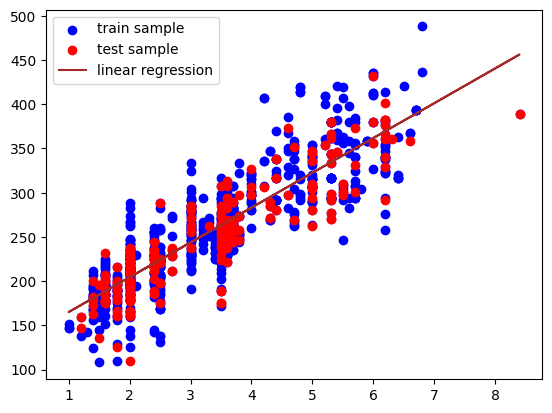

In [83]:
plt.scatter(x1_train.reshape(-1, 1), y_train.reshape(-1, 1), color= 'blue')
plt.scatter(x1_test.reshape(-1, 1), y_test.reshape(-1, 1), color= 'red')
plt.plot(x1_train, reg.coef_[0][0] *x1_train + reg.intercept_[0], color= 'brown')
plt.legend(['train sample', 'test sample', 'linear regression'])
plt.show()

In [84]:
from sklearn.metrics import r2_score

test_y_ = reg.predict(x1_test.reshape(-1, 1))

print(f'Mean Absolute Error : {np.mean(np.absolute(test_y_ - y_test.reshape(-1, 1)))}')
print(f'Residual Sum of Squares (MSE) : {np.mean(test_y_ - y_test.reshape(-1, 1)) ** 2}')
print(f'R2-Score is : {r2_score(y_test.reshape(-1, 1), test_y_)}')

Mean Absolute Error : 22.437922937949352
Residual Sum of Squares (MSE) : 33.00285225160142
R2-Score is : 0.7862225609081641
